In [27]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, zero_one_loss

sns.set_theme(style='whitegrid')

In [28]:
from glob import glob
import re
from collections import defaultdict

def extract_and_combine(file: str, combine: bool=False):
    '''Collect and combine data
    
    params
    ======
    
    file:
        File name with wild (*) to search for.
    combine:
        Flag for whether returning combined dataframe of history.
    '''
    
    data = {} # Experiment -> results
    
    # Convert file wildcard into valid RegEx wildcard
    pattern = file.replace('*', '(.*)')

    # Collect every pickle file and load into data dictionary
    for f in glob(file):
        match = re.search(pattern, f)
        experiment = match.group(1).strip()
        with open(f, 'rb') as jar:
            data[experiment] = pickle.load(jar)
    
    # Combines the data into a singlue dictionary.
    if combine:
        combined_history =  defaultdict(list)
        for exp_num, _dict in data.items():
            for key, value in _dict['history'].items():
                combined_history[key].append(value[0])
            
        #history_frames = [pd.DataFrame(_dict['history']) for _dict in list(data.values())]
        return data, combined_history
    else:
        return data

# SPECT Dataset

# OLD EXPERIMENTS

In [117]:
data, history_SPECT = extract_and_combine(file='results/SPECT_feb6/SPECT_*_results.pkl', combine=True)
SPECT_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
SPECT_data = {'test_score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_SPECT.items():
    if n_buckets in ['L', 'best_model'] : # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        SPECT_data['test_score'].append(score)
        SPECT_data['buckets'].append(100 - n_buckets)
        SPECT_data['n_run'].append(n_run)
        

## NEW EXPERIMENTS

In [128]:
data, history_SPECT = extract_and_combine(file='results/SPECT_feb17/SPECT__*_results.pkl', combine=True)
SPECT_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
SPECT_data = {'test_score': [], 'train_score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_SPECT.items():
    if n_buckets in ['L', 'best_model'] : # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        SPECT_data['test_score'].append(score[0])
        SPECT_data['train_score'].append(score[1])
        SPECT_data['buckets'].append(100 - n_buckets)
        SPECT_data['n_run'].append(n_run)
        

In [129]:
#Spambase with SMOTE# Plot Configuration
height = 4
aspect = 12/7

In [130]:
np.split(np.array(SPECT_data['test_score']), 100)

[array([0.79452055, 0.46575342, 0.79452055, 0.79452055, 0.79452055,
        0.79452055, 0.21917808, 0.79452055, 0.21917808, 0.73972603,
        0.73972603, 0.79452055, 0.79452055, 0.79452055, 0.79452055,
        0.79452055, 0.73972603, 0.79452055, 0.79452055, 0.79452055,
        0.7260274 , 0.79452055, 0.79452055, 0.73972603, 0.79452055,
        0.79452055, 0.79452055, 0.79452055, 0.79452055, 0.79452055,
        0.79452055, 0.79452055, 0.79452055, 0.36986301, 0.79452055,
        0.20547945, 0.79452055, 0.20547945, 0.79452055, 0.79452055,
        0.79452055, 0.79452055, 0.79452055, 0.79452055, 0.78082192,
        0.73972603, 0.79452055, 0.79452055, 0.79452055, 0.67123288,
        0.79452055, 0.30136986, 0.79452055, 0.69863014, 0.79452055,
        0.79452055, 0.79452055, 0.79452055, 0.79452055, 0.79452055,
        0.79452055, 0.79452055, 0.79452055, 0.79452055, 0.79452055,
        0.79452055, 0.79452055, 0.20547945, 0.79452055, 0.65753425,
        0.68493151, 0.79452055, 0.78082192, 0.79

In [131]:
pd.DataFrame([SPECT_data['test_score'], SPECT_data['buckets'], ]).T.groupby([1]).min().iloc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.643836
25.0,0.630137
50.0,0.575342
75.0,0.602740
90.0,0.493151
95.0,0.410959
99.0,0.205479


In [132]:
pd.DataFrame([SPECT_data['test_score'], SPECT_data['buckets'], ]).T.groupby([1]).mean().iloc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.753151
25.0,0.734932
50.0,0.718767
75.0,0.709726
90.0,0.707260
95.0,0.705342
99.0,0.715616


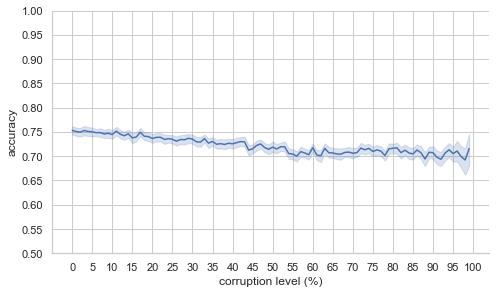

In [24]:
ax = sns.relplot(data=SPECT_data, kind='line', x='buckets', y='test_score', height=height, aspect=aspect)
# Figure Attributes (using pyplot)
#plt.title('Score vs Buckets Used (Synthetic Linearly-Separable)')
# Since the lowest number of buckets used is 1, I add it directly bc range will not allow it
plt.xticks(
    ticks=range(0, 101, 5), 
    labels=[percentage for percentage in range(0, 101, 5)]
)
plt.yticks(np.linspace(1, 0.5, 11))
plt.xlabel("corruption level (%)")
plt.ylabel("accuracy")
#plt.invert_xaxis()
#plt.title("SPECT dataset trained with SMOTE, tested on imbalanced data")
#plt.gca().invert_xaxis()
#ax.set(title='Score vs Buckets Used')
#plt.show()
plt.savefig('SPECT_percent.png', dpi=200)

## Confusion Matrix

In [44]:
 history_SPECT['best_model'][0].keys()

dict_keys(['X', 'y', 'model', 'train_score', 'train_pred', 'test_score', 'test_pred'])

In [45]:
    
# Best and Worst confusion matrices
SPECT_scores = {
    'precision': [],
    'recall'   : [],
    'F1'       : [],
    'true_pred': [],
    'zero_one' : [],
}


# Create Confusion Matrices
dataset = 'train_pred'# Whoops, I flipped this in code!
SPECT_cm = []
for hist in history_SPECT['best_model']:
    SPECT_cm.append(confusion_matrix(hist['y'], hist[dataset]))
    SPECT_scores['zero_one'].append(accuracy_score(hist['y'], hist[dataset]))

for cm in SPECT_cm:
    # Error types
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    # Comparison score calculations
    precision = TP / (TP + FP)
    SPECT_scores['precision'].append(precision)
    
    recall    = TP / (TP + FN)
    SPECT_scores['recall'].append(recall)
    
    F1        = (2*(precision * recall)) / (precision + recall)
    SPECT_scores['F1'].append(F1)
    
    true_pred = TP + TN
    SPECT_scores['true_pred'].append(true_pred)
    
    
    
    
SPECT_scores = pd.DataFrame(SPECT_scores)

/tmp/ipykernel_136756/2281171209.py:26: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)


In [46]:
SPECT_scores['zero_one'].mean()

0.7156164383561644

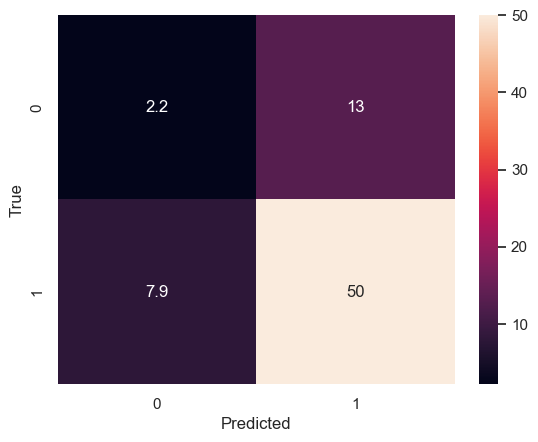

In [47]:
# Average Confusion Matrix
SPECT_avg_cm = sum(SPECT_cm) / len(SPECT_cm)

gfg = sns.heatmap(SPECT_avg_cm, annot=True)
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('SPECT_avg_confusion.png', dpi=200)

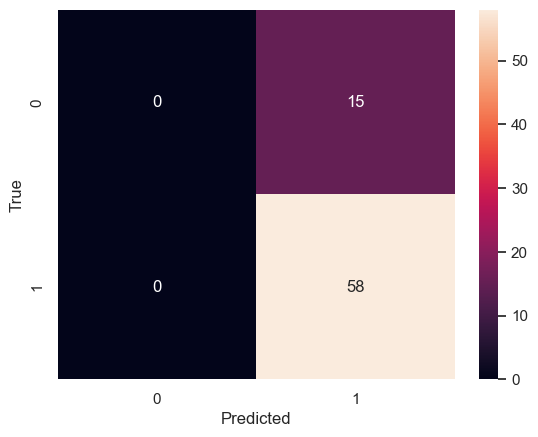

In [48]:
# Best confusion matrix
m_index = SPECT_scores['F1'].argmax()


gfg = sns.heatmap(SPECT_cm[m_index], annot=True)
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('SPECT_best_confusion.png', dpi=200)

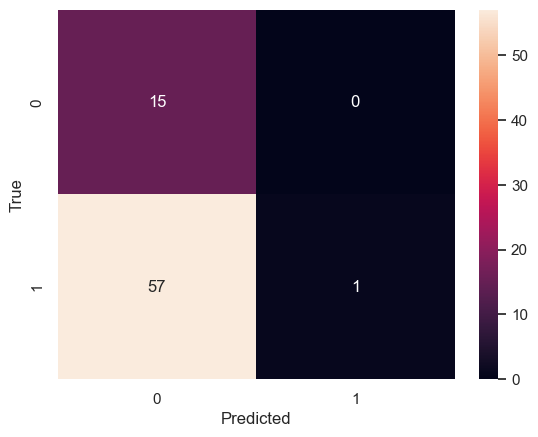

In [49]:
# Best confusion matrix
m_index = SPECT_scores['F1'].argmin()


gfg = sns.heatmap(SPECT_cm[m_index], annot=True)
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('SPECT_worst_confusion.png', dpi=200)

## SMOTE SPECT Dataset

In [46]:
data, history_SPECT = extract_and_combine(file='results/SPECT_feb17/SPECT_SMOTE_*_results.pkl', combine=True)
SPECT_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
SPECT_data = {'test_score': [], 'train_score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_SPECT.items():
    if n_buckets in ['L', 'best_model'] : # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        SPECT_data['test_score'].append(score[0])
        SPECT_data['train_score'].append(score[1])
        SPECT_data['buckets'].append(100 - n_buckets)
        SPECT_data['n_run'].append(n_run)
        

In [47]:
# Plot Configuration
height = 4
aspect = 12/7

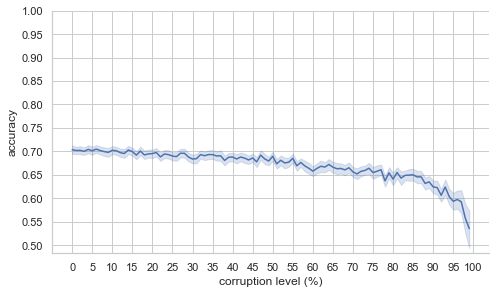

In [48]:
ax = sns.relplot(data=SPECT_data, kind='line', x='buckets', y='test_score', height=height, aspect=aspect)
# Figure Attributes (using pyplot)
#plt.title('Score vs Buckets Used (Synthetic Linearly-Separable)')
# Since the lowest number of buckets used is 1, I add it directly bc range will not allow it
plt.xticks(
    ticks=range(0, 101, 5), 
    labels=[percentage for percentage in range(0, 101, 5)]
)
plt.yticks(np.linspace(1, 0.5, 11))
plt.xlabel("corruption level (%)")
plt.ylabel("accuracy")
#plt.invert_xaxis()
#plt.title("SPECT dataset trained with SMOTE, tested on imbalanced data")
#plt.gca().invert_xaxis()
#ax.set(title='Score vs Buckets Used')
#plt.show()
plt.savefig('SPECT_SMOTE_percent.png', dpi=200)

In [49]:
pd.DataFrame([SPECT_data['test_score'], SPECT_data['buckets'], ]).T.groupby([1]).min().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.575342
25.0,0.575342
50.0,0.561644
75.0,0.479452
90.0,0.410959
95.0,0.369863
99.0,0.205479


In [50]:
pd.DataFrame([SPECT_data['test_score'], SPECT_data['buckets'], ]).T.groupby([1]).mean().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.703288
25.0,0.689863
50.0,0.689178
75.0,0.654521
90.0,0.623973
95.0,0.593288
99.0,0.534932


## Confusion Matrix

In [53]:
 history_SPECT['best_model'][0].keys()

dict_keys(['X', 'y', 'model', 'train_score', 'train_pred', 'test_score', 'test_pred'])

In [54]:
    
# Best and Worst confusion matrices
SPECT_scores = {
    'precision': [],
    'recall'   : [],
    'F1'       : [],
    'true_pred': [],
    'zero_one' : [],
}


# Create Confusion Matrices
dataset = 'train_pred'# Whoops, I flipped this in code!
SPECT_cm = []
for hist in history_SPECT['best_model']:
    SPECT_cm.append(confusion_matrix(hist['y'], hist[dataset]))
    SPECT_scores['zero_one'].append(accuracy_score(hist['y'], hist[dataset]))

for cm in SPECT_cm:
    # Error types
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    # Comparison score calculations
    precision = TP / (TP + FP)
    SPECT_scores['precision'].append(precision)
    
    recall    = TP / (TP + FN)
    SPECT_scores['recall'].append(recall)
    
    F1        = (2*(precision * recall)) / (precision + recall)
    SPECT_scores['F1'].append(F1)
    
    true_pred = TP + TN
    SPECT_scores['true_pred'].append(true_pred)
    
    
    
    
SPECT_scores = pd.DataFrame(SPECT_scores)

/tmp/ipykernel_136756/2281171209.py:26: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)


In [55]:
SPECT_scores['zero_one'].mean()

0.5349315068493151

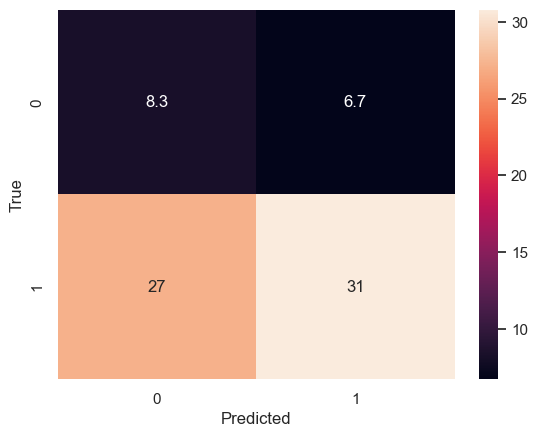

In [56]:
# Average Confusion Matrix
SPECT_avg_cm = sum(SPECT_cm) / len(SPECT_cm)

gfg = sns.heatmap(SPECT_avg_cm, annot=True)
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('SPECT_avg_confusion.png', dpi=200)

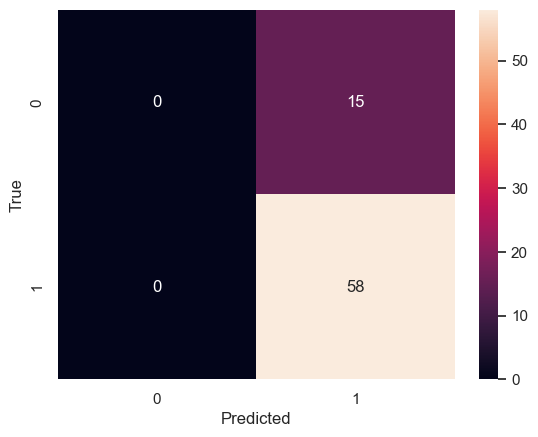

In [57]:
# Best confusion matrix
m_index = SPECT_scores['F1'].argmax()


gfg = sns.heatmap(SPECT_cm[m_index], annot=True)
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('SPECT_best_confusion.png', dpi=200)

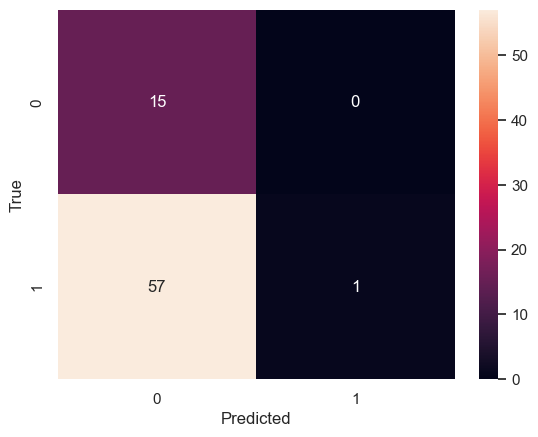

In [58]:
# Best confusion matrix
m_index = SPECT_scores['F1'].argmin()


gfg = sns.heatmap(SPECT_cm[m_index], annot=True)
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('SPECT_worst_confusion.png', dpi=200)

# Spambase Dataset

## OLD EXPERIMENTS

In [144]:
data, history_spam = extract_and_combine(file='results/spambase_feb6/spambase_*_results.pkl', combine=True)
spam_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
spam_data = {'test_score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_spam.items():
    if n_buckets in ['L', 'best_model'] : # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        spam_data['test_score'].append(score)
        spam_data['buckets'].append(100 - n_buckets)
        spam_data['n_run'].append(n_run)
        

## NEW EXPERIMENTS

In [8]:
data, history_spam = extract_and_combine(file='results/spambase_feb17/spambase__*_results.pkl', combine=True)
spam_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
spam_data = {'train_score': [], 'test_score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_spam.items():
    if n_buckets in ['L', 'best_model'] : # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        spam_data['train_score'].append(score[1])
        spam_data['test_score'].append(score[0])
        spam_data['buckets'].append(100 - n_buckets)
        spam_data['n_run'].append(n_run)
        

In [9]:
spam_data

{'train_score': [1.0,
  0.9642857142857143,
  0.9642857142857143,
  0.8928571428571429,
  1.0,
  0.8571428571428571,
  0.8928571428571429,
  1.0,
  1.0,
  0.9642857142857143,
  0.8928571428571429,
  0.9285714285714286,
  0.9285714285714286,
  0.9642857142857143,
  0.9642857142857143,
  0.9285714285714286,
  0.9285714285714286,
  0.8214285714285714,
  0.8928571428571429,
  0.8571428571428571,
  0.9285714285714286,
  0.8214285714285714,
  0.8928571428571429,
  0.9285714285714286,
  0.9642857142857143,
  0.8928571428571429,
  0.9285714285714286,
  0.9642857142857143,
  1.0,
  0.9285714285714286,
  0.9642857142857143,
  1.0,
  1.0,
  0.9642857142857143,
  0.9285714285714286,
  1.0,
  0.9642857142857143,
  1.0,
  0.8928571428571429,
  0.8214285714285714,
  0.8571428571428571,
  1.0,
  0.9285714285714286,
  0.8214285714285714,
  0.9642857142857143,
  0.9285714285714286,
  0.8571428571428571,
  0.8214285714285714,
  1.0,
  0.8571428571428571,
  0.8214285714285714,
  0.7857142857142857,
  0.96

In [10]:
# Plot Configuration
height = 4
aspect = 12/7

AttributeError: 'FacetGrid' object has no attribute 'figure'

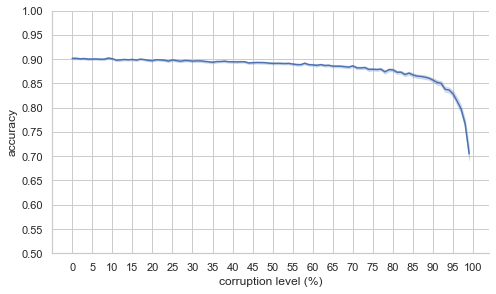

In [11]:
ax = sns.relplot(data=spam_data, kind='line', x='buckets', y='test_score', height=height, aspect=aspect)
# Figure Attributes (using pyplot)
#plt.title('Score vs Buckets Used (Synthetic Linearly-Separable)')
# Since the lowest number of buckets used is 1, I add it directly bc range will not allow it
plt.xticks(
    ticks=range(0, 101, 5), 
    labels=[percentage for percentage in range(0, 101, 5)]
)
plt.yticks(np.linspace(1., 0.5, 11))
plt.xlabel("corruption level (%)")
plt.ylabel("accuracy")
#plt.title("spambase dataset trained with SMOTE, tested on imbalanced data")
#plt.gca().invert_xaxis()
#ax.set(title='Score vs Buckets Used')
#plt.show()
ax.figure.savefig('spambase_percent.png', dpi=200)

## Confusion Matrix

In [64]:
dataset = 'train_pred'# Whoops, I flipped this in code!


# Create Confusion Matrices
spam_cm = []
for hist in history_spam['best_model']:
    spam_cm.append(confusion_matrix(hist['y'], hist[dataset]))
    
# Best and Worst confusion matrices
spam_scores = {
    'precision': [],
    'recall'   : [],
    'F1'       : [],
    'true_pred': []
}

for cm in spam_cm:
    # Error types
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    # Comparison score calculations
    precision = TP / (TP + FP)
    spam_scores['precision'].append(precision)
    
    recall    = TP / (TP + FN)
    spam_scores['recall'].append(recall)
    
    F1        = (2*(precision * recall)) / (precision + recall)
    spam_scores['F1'].append(F1)
    
    true_pred = TP + TN
    spam_scores['true_pred'].append(true_pred)
    
spam_scores = pd.DataFrame(spam_scores)

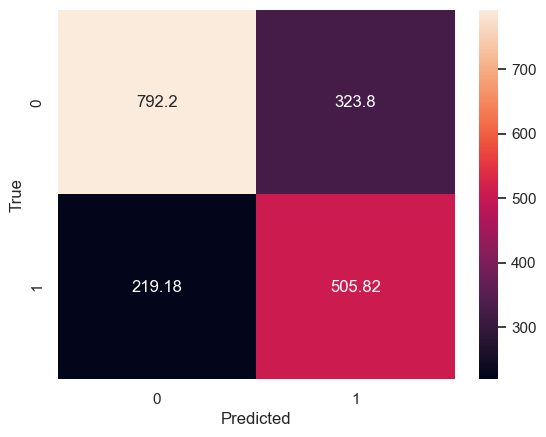

In [80]:
# Average Confusion Matrix
spam_avg_cm = sum(spam_cm) / len(spam_cm)

gfg = sns.heatmap(spam_avg_cm, annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('spam_avg_confusion.png', dpi=200)

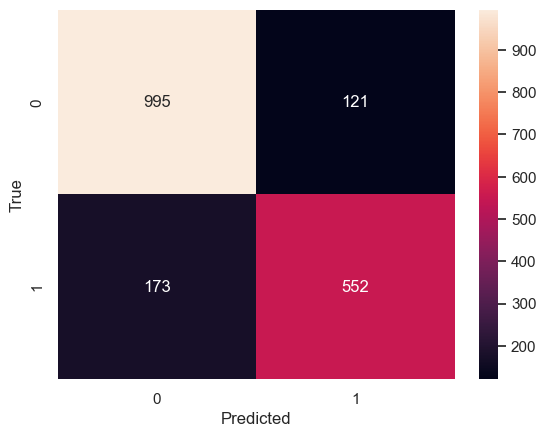

In [66]:
# Best confusion matrix
m_index = spam_scores['true_pred'].argmax()


gfg = sns.heatmap(spam_cm[m_index], annot=True, fmt='g')

gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('spam_best_confusion.png', dpi=200)

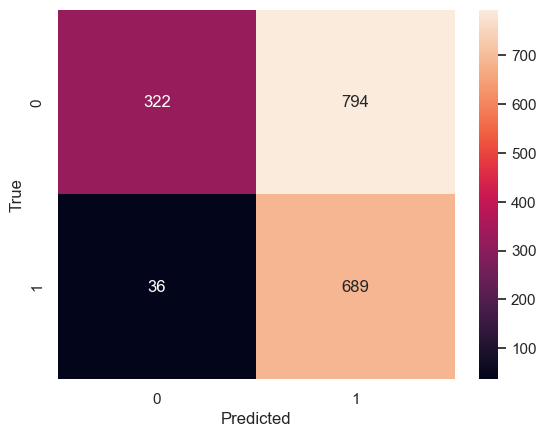

In [67]:
# Best confusion matrix
m_index = spam_scores['true_pred'].argmin()


gfg = sns.heatmap(spam_cm[m_index], annot=True, fmt='g')

gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('spam_worst_confusion.png', dpi=200)

## SMOTE spambase Dataset

In [133]:
data, history_spam = extract_and_combine(file='results/spambase_feb17/spambase_SMOTE_*_results.pkl', combine=True)
spam_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
spam_data = {'train_score': [], 'test_score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_spam.items():
    if n_buckets in ['L', 'best_model'] : # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        spam_data['train_score'].append(score[1])
        spam_data['test_score'].append(score[0])
        spam_data['buckets'].append(100 - n_buckets)
        spam_data['n_run'].append(n_run)
        

In [134]:
spam_data

{'train_score': [0.8823529411764706,
  0.8529411764705882,
  0.9705882352941176,
  0.9117647058823529,
  0.8235294117647058,
  0.9705882352941176,
  0.8823529411764706,
  0.9117647058823529,
  1.0,
  0.9411764705882353,
  0.9411764705882353,
  0.7647058823529411,
  1.0,
  1.0,
  0.9705882352941176,
  0.8823529411764706,
  0.9117647058823529,
  0.9117647058823529,
  0.9117647058823529,
  0.9117647058823529,
  0.8235294117647058,
  0.8235294117647058,
  1.0,
  0.8235294117647058,
  0.7941176470588235,
  0.8529411764705882,
  0.8235294117647058,
  1.0,
  0.9411764705882353,
  0.8529411764705882,
  0.9411764705882353,
  0.9705882352941176,
  0.9117647058823529,
  0.8529411764705882,
  0.9117647058823529,
  0.8529411764705882,
  0.8529411764705882,
  0.8529411764705882,
  0.8235294117647058,
  0.8823529411764706,
  0.9117647058823529,
  0.8823529411764706,
  0.9411764705882353,
  0.8823529411764706,
  0.8235294117647058,
  1.0,
  0.9411764705882353,
  0.7941176470588235,
  0.911764705882352

In [135]:
# Plot Configuration
height = 4
aspect = 12/7

AttributeError: 'FacetGrid' object has no attribute 'figure'

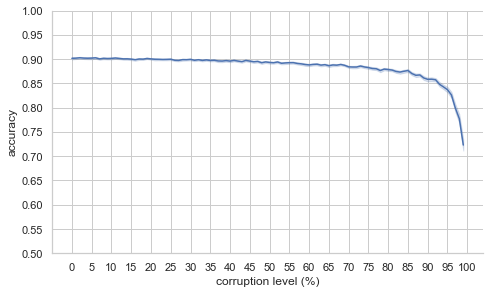

In [136]:
ax = sns.relplot(data=spam_data, kind='line', x='buckets', y='test_score', height=height, aspect=aspect)
# Figure Attributes (using pyplot)
#plt.title('Score vs Buckets Used (Synthetic Linearly-Separable)')
# Since the lowest number of buckets used is 1, I add it directly bc range will not allow it
plt.xticks(
    ticks=range(0, 101, 5), 
    labels=[percentage for percentage in range(0, 101, 5)]
)
plt.yticks(np.linspace(1., 0.5, 11))
plt.xlabel("corruption level (%)")
plt.ylabel("accuracy")
#plt.title("spambase dataset trained with SMOTE, tested on imbalanced data")
#plt.gca().invert_xaxis()
#ax.set(title='Score vs Buckets Used')
#plt.show()
ax.figure.savefig('spambase_SMOTE_percent.png', dpi=200)

In [137]:
pd.DataFrame([spam_data['test_score'], spam_data['buckets'], ]).T.groupby([1]).min().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.860402
25.0,0.863661
50.0,0.852797
75.0,0.835416
90.0,0.791418
95.0,0.757197
99.0,0.542097


In [138]:
pd.DataFrame([spam_data['test_score'], spam_data['buckets'], ]).T.groupby([1]).mean().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.901771
25.0,0.899924
50.0,0.893292
75.0,0.882662
90.0,0.858446
95.0,0.837094
99.0,0.723080


## Confusion Matrix

In [139]:
# Create Confusion Matrices
spam_cm = []
for hist in history_spam['best_model']:
    spam_cm.append(confusion_matrix(hist['y'], hist['pred']))
    
# Best and Worst confusion matrices
spam_scores = {
    'precision': [],
    'recall'   : [],
    'F1'       : [],
    'true_pred': []
}

for cm in spam_cm:
    # Error types
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    # Comparison score calculations
    precision = TP / (TP + FP)
    spam_scores['precision'].append(precision)
    
    recall    = TP / (TP + FN)
    spam_scores['recall'].append(recall)
    
    F1        = (2*(precision * recall)) / (precision + recall)
    spam_scores['F1'].append(F1)
    
    true_pred = TP + TN
    spam_scores['true_pred'].append(true_pred)
    
spam_scores = pd.DataFrame(spam_scores)

KeyError: 'pred'

In [140]:
# Average Confusion Matrix
spam_avg_cm = sum(spam_cm) / len(spam_cm)

gfg = sns.heatmap(spam_avg_cm, annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('spam_avg_confusion.png', dpi=200)

ZeroDivisionError: division by zero

In [141]:
# Best confusion matrix
m_index = spam_scores['true_pred'].argmax()


gfg = sns.heatmap(spam_cm[m_index], annot=True, fmt='g')

gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('spam_best_confusion.png', dpi=200)

NameError: name 'spam_scores' is not defined

In [142]:
# Best confusion matrix
m_index = spam_scores['true_pred'].argmin()


gfg = sns.heatmap(spam_cm[m_index], annot=True, fmt='g')

gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('spam_worst_confusion.png', dpi=200)

NameError: name 'spam_scores' is not defined

# Taiwan Bankrupcy Dataset without SMOTE

In [14]:
data, history_bank = extract_and_combine(file='results/bankrupcy_feb18/bankrupcy__*_results.pkl', combine=True)
bank_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
bank_data = {'train_score': [], 'test_score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_bank.items():
    if n_buckets in ['L', 'best_model'] : # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        bank_data['train_score'].append(score[0])
        bank_data['test_score'].append(score[1])
        bank_data['buckets'].append(100 - n_buckets)
        bank_data['n_run'].append(n_run)
        

In [15]:
bank_data

{'train_score': [0.906891495601173,
  0.9582111436950147,
  0.8603372434017595,
  0.9230205278592375,
  0.8596041055718475,
  0.8889296187683284,
  0.9468475073313783,
  0.9541788856304986,
  0.9494134897360704,
  0.908357771260997,
  0.9505131964809385,
  0.9508797653958945,
  0.9325513196480938,
  0.8698680351906158,
  0.9336510263929618,
  0.9384164222873901,
  0.9651759530791789,
  0.9640762463343109,
  0.9552785923753666,
  0.9024926686217009,
  0.9303519061583577,
  0.9648093841642229,
  0.9208211143695014,
  0.9446480938416423,
  0.967375366568915,
  0.9274193548387096,
  0.9637096774193549,
  0.8969941348973607,
  0.9266862170087976,
  0.9175219941348973,
  0.9277859237536656,
  0.8585043988269795,
  0.8599706744868035,
  0.9241202346041055,
  0.9149560117302052,
  0.9101906158357771,
  0.9637096774193549,
  0.9222873900293255,
  0.9585777126099707,
  0.8925953079178885,
  0.9270527859237536,
  0.9563782991202346,
  0.9230205278592375,
  0.9461143695014663,
  0.8925953079178885

In [16]:
# Plot Configuration
height = 4
aspect = 12/7

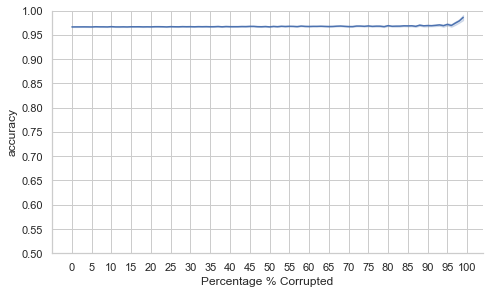

In [17]:
ax = sns.relplot(data=bank_data, kind='line', x='buckets', y='test_score', height=height, aspect=aspect)
# Figure Attributes (using pyplot)
#plt.title('Score vs Buckets Used (Synthetic Linearly-Separable)')
# Since the lowest number of buckets used is 1, I add it directly bc range will not allow it
plt.xticks(
    ticks=range(0, 101, 5), 
    labels=[percentage for percentage in range(0, 101, 5)]
)
plt.yticks(np.linspace(1., .5, 11))
plt.xlabel("Percentage % Corrupted")
plt.ylabel("accuracy")
#plt.gca().invert_xaxis()
#ax.set(title='Score vs Buckets Used')
#plt.show()
plt.savefig('bankrupcy_percent.png', dpi=200)

## Confusion Matrix

In [182]:
# Create Confusion Matrices
bank_cm = []
for hist in history_bank['best_model']:
    bank_cm.append(confusion_matrix(hist['y'], hist['train_pred']))
    
# Best and Worst confusion matrices
bank_scores = {
    'precision': [],
    'recall'   : [],
    'F1'       : [],
    'true_pred': []
}

for cm in bank_cm:
    # Error types
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    # Comparison score calculations
    precision = TP / (TP + FP)
    bank_scores['precision'].append(precision)
    
    recall    = TP / (TP + FN)
    bank_scores['recall'].append(recall)
    
    F1        = (2*(precision * recall)) / (precision + recall)
    bank_scores['F1'].append(F1)
    
    true_pred = TP + TN
    bank_scores['true_pred'].append(true_pred)
    
bank_scores = pd.DataFrame(bank_scores)

/tmp/ipykernel_136756/3870156612.py:28: RuntimeWarning: invalid value encountered in double_scalars
  F1        = (2*(precision * recall)) / (precision + recall)


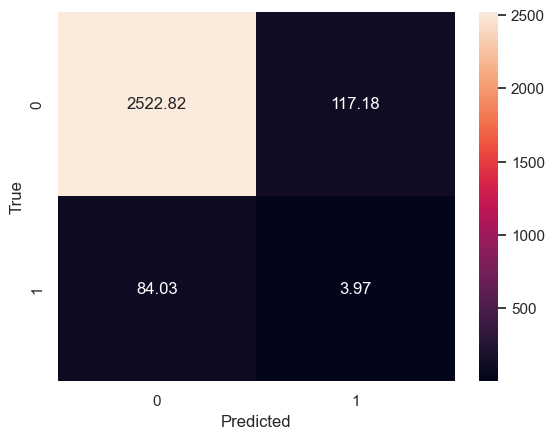

In [183]:
# Average Confusion Matrix
bank_avg_cm = sum(bank_cm) / len(bank_cm)

gfg = sns.heatmap(bank_avg_cm, annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_avg_confusion.png', dpi=200)

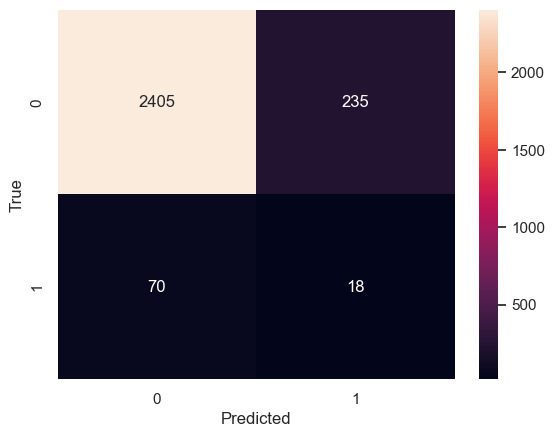

In [184]:
# Best confusion matrix
m_index = bank_scores['F1'].argmax()


gfg = sns.heatmap(bank_cm[m_index], annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_best_confusion.png', dpi=200)

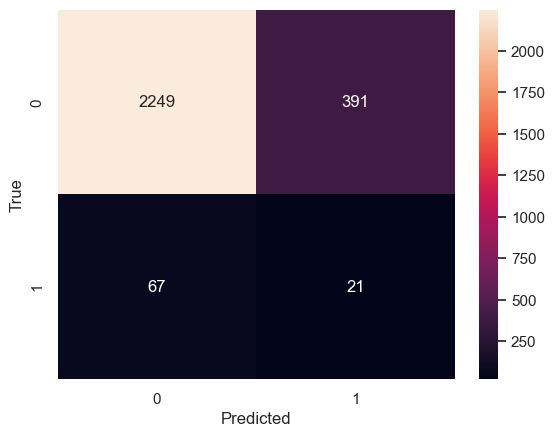

In [185]:
# Best confusion matrix
m_index = bank_scores['true_pred'].argmin()


gfg = sns.heatmap(bank_cm[m_index], annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_worst_confusion.png', dpi=200)

# Taiwan Bankrupcy Dataset with SMOTE

In [53]:
data, history_bank = extract_and_combine(file='results/bankrupcy_feb18/bankrupcy_SMOTE_*_results.pkl', combine=True)
bank_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
bank_data = {'train_score': [], 'test_score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_bank.items():
    if n_buckets in ['L', 'best_model'] : # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        bank_data['train_score'].append(score[0])
        bank_data['test_score'].append(score[1])
        bank_data['buckets'].append(100 - n_buckets)
        bank_data['n_run'].append(n_run)
        

In [54]:
bank_data

{'train_score': [0.7342375366568915,
  0.6099706744868035,
  0.6026392961876833,
  0.5667155425219942,
  0.35080645161290325,
  0.5865102639296188,
  0.6359970674486803,
  0.5890762463343109,
  0.4637096774193548,
  0.39552785923753664,
  0.591275659824047,
  0.5113636363636364,
  0.4189882697947214,
  0.44244868035190615,
  0.8361436950146628,
  0.7591642228739003,
  0.2587976539589443,
  0.6873167155425219,
  0.5414222873900293,
  0.37719941348973607,
  0.8456744868035191,
  0.6323313782991202,
  0.5260263929618768,
  0.6590909090909091,
  0.49780058651026393,
  0.4941348973607038,
  0.6931818181818182,
  0.7785923753665689,
  0.8610703812316716,
  0.6418621700879765,
  0.45784457478005863,
  0.6733870967741935,
  0.43841642228739003,
  0.3588709677419355,
  0.6077712609970675,
  0.6085043988269795,
  0.6990469208211144,
  0.7463343108504399,
  0.2631964809384164,
  0.718108504398827,
  0.4398826979472141,
  0.4743401759530792,
  0.6766862170087976,
  0.6315982404692082,
  0.37976539

In [55]:
# Plot Configuration
height = 4
aspect = 12/7

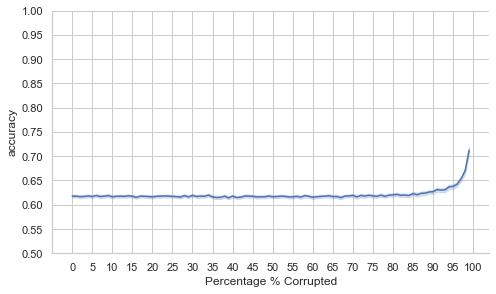

In [56]:
ax = sns.relplot(data=bank_data, kind='line', x='buckets', y='test_score', height=height, aspect=aspect)
# Figure Attributes (using pyplot)
#plt.title('Score vs Buckets Used (Synthetic Linearly-Separable)')
# Since the lowest number of buckets used is 1, I add it directly bc range will not allow it
plt.xticks(
    ticks=range(0, 101, 5), 
    labels=[percentage for percentage in range(0, 101, 5)]
)
plt.yticks(np.linspace(1., .5, 11))
plt.xlabel("Percentage % Corrupted")
plt.ylabel("accuracy")
#plt.gca().invert_xaxis()
#ax.set(title='Score vs Buckets Used')
#plt.show()
plt.savefig('bankrupcy_SMOTE_percent.png', dpi=200)

In [25]:
pd.DataFrame([bank_data['test_score'], bank_data['buckets'], ]).T.groupby([1]).min().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.961868
25.0,0.959596
50.0,0.959883
75.0,0.953033
90.0,0.941463
95.0,0.931707
99.0,0.878049


In [26]:
pd.DataFrame([bank_data['test_score'], bank_data['buckets'], ]).T.groupby([1]).mean().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.966519
25.0,0.967074
50.0,0.966619
75.0,0.968571
90.0,0.969293
95.0,0.971707
99.0,0.986098


In [203]:
pd.DataFrame(history_bank['best_model'][1]['y']).value_counts()

-1    2640
 1      88
dtype: int64

In [198]:
# Create Confusion Matrices
bank_cm = []
for hist in history_bank['best_model']:
    bank_cm.append(confusion_matrix(hist['y'], hist['train_pred']))
    
# Best and Worst confusion matrices
bank_scores = {
    'precision': [],
    'recall'   : [],
    'F1'       : [],
    'true_pred': []
}

for cm in bank_cm:
    # Error types
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    # Comparison score calculations
    precision = TP / (TP + FP)
    bank_scores['precision'].append(precision)
    
    recall    = TP / (TP + FN)
    bank_scores['recall'].append(recall)
    
    F1        = (2*(precision * recall)) / (precision + recall)
    bank_scores['F1'].append(F1)
    
    true_pred = TP + TN
    bank_scores['true_pred'].append(true_pred)
    
bank_scores = pd.DataFrame(bank_scores)

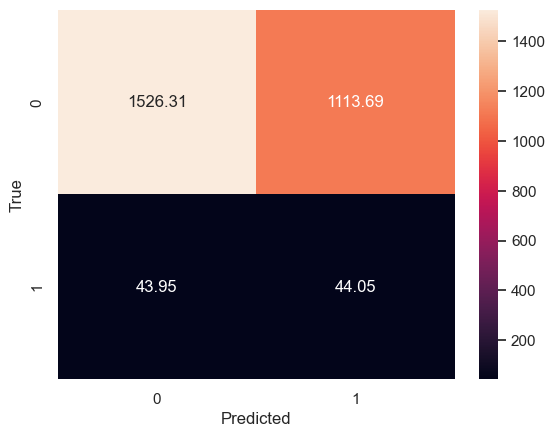

In [204]:
# Average Confusion Matrix
bank_avg_cm = sum(bank_cm) / len(bank_cm)

gfg = sns.heatmap(bank_avg_cm, annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_avg_confusion.png', dpi=200)

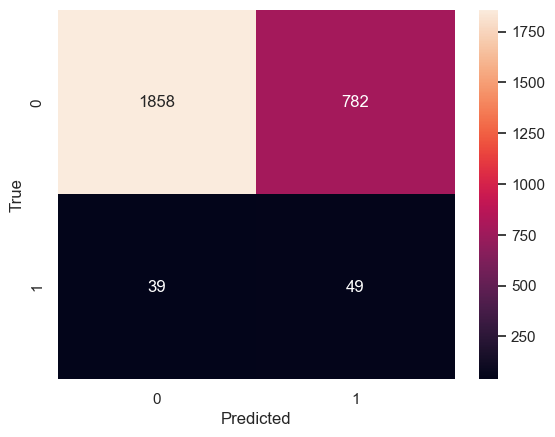

In [193]:
# Best confusion matrix
m_index = bank_scores['F1'].argmax()


gfg = sns.heatmap(bank_cm[m_index], annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_best_confusion.png', dpi=200)

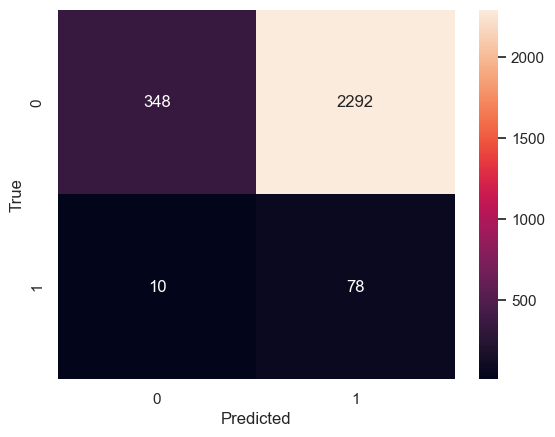

In [194]:
# Best confusion matrix
m_index = bank_scores['true_pred'].argmin()


gfg = sns.heatmap(bank_cm[m_index], annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_worst_confusion.png', dpi=200)

## SMOTE Iris Dataset

In [79]:
data, history_iris_smote = extract_and_combine(file='results/iris_SMOTE_*_results.pkl', combine=True)
iris_smote_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
iris_smote_data = {'test_score': [], 'train_score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_iris_smote.items():
    if n_buckets in ['L', 'best_model'] : # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        iris_smote_data['test_score'].append(score[0])
        iris_smote_data['train_score'].append(score[1])
        iris_smote_data['buckets'].append(100 - n_buckets)
        iris_smote_data['n_run'].append(n_run)
        

In [80]:
#Spambase with SMOTE# Plot Configuration
height = 4
aspect = 12/7

In [81]:
iris_smote_data

{'test_score': [1.0,
  1.0,
  0.3333333333333333,
  1.0,
  1.0,
  0.4,
  0.7333333333333333,
  0.9666666666666667,
  0.9333333333333333,
  0.7666666666666667,
  0.3333333333333333,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  1.0,
  0.3333333333333333,
  1.0,
  0.6666666666666666,
  0.6666666666666666,
  1.0,
  0.3333333333333333,
  0.3333333333333333,
  0.3333333333333333,
  1.0,
  0.6666666666666666,
  1.0,
  0.3333333333333333,
  0.3333333333333333,
  0.7,
  0.6666666666666666,
  0.7333333333333333,
  0.6666666666666666,
  1.0,
  1.0,
  1.0,
  1.0,
  0.3333333333333333,
  0.6666666666666666,
  1.0,
  0.8666666666666667,
  0.3333333333333333,
  1.0,
  0.6666666666666666,
  0.3333333333333333,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9,
  0.3333333333333333,
  0.3333333333333333,
  0.7666666666666667,
  1.0,
  0.3333333333333333,
  0.6666666666666666,
  1.0,
  1.0,
  0.9333333333333333,
  1.0,
  0.6666666666666666,
  1.0,
  1.0,
  0.6666666666666666,
  0.6333333333333333

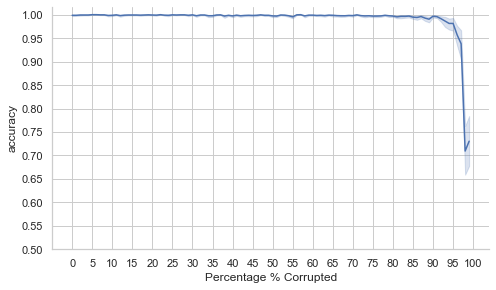

In [82]:
ax = sns.relplot(data=iris_smote_data, kind='line', x='buckets', y='test_score', height=height, aspect=aspect)
# Figure Attributes (using pyplot)
#plt.title('Score vs Buckets Used (Synthetic Linearly-Separable)')
# Since the lowest number of buckets used is 1, I add it directly bc range will not allow it
plt.xticks(
    ticks=range(0, 101, 5), 
    labels=[percentage for percentage in range(0, 101, 5)]
)
plt.yticks(np.linspace(1., .5, 11))
plt.xlabel("Percentage % Corrupted")
plt.ylabel("accuracy")
#plt.gca().invert_xaxis()
#ax.set(title='Score vs Buckets Used')
#plt.show()
plt.savefig('iris_percent.png', dpi=200)

In [83]:
pd.DataFrame([iris_smote_data['test_score'], iris_smote_data['buckets'], ]).T.groupby([1]).min().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.933333
25.0,0.966667
50.0,0.933333
75.0,0.933333
90.0,0.933333
95.0,0.433333
99.0,0.333333


In [85]:
pd.DataFrame([iris_smote_data['test_score'], iris_smote_data['buckets'], ]).T.groupby([1]).mean().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.998667
25.0,0.999667
50.0,0.997333
75.0,0.997000
90.0,0.996667
95.0,0.981333
99.0,0.730333


In [108]:
# Create Confusion Matrices
iris_smote_cm = []
for hist in history_iris_smote['best_model']:
    iris_smote_cm.append(confusion_matrix(hist['y'], hist['train_pred']))
    
# Best and Worst confusion matrices
iris_smote_scores = {
    'precision': [],
    'recall'   : [],
    'F1'       : [],
    'true_pred': []
}

for cm in iris_smote_cm:
    # Error types
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    # Comparison score calculations
    precision = TP / (TP + FP)
    iris_smote_scores['precision'].append(precision)
    
    recall    = TP / (TP + FN)
    iris_smote_scores['recall'].append(recall)
    
    F1        = (2*(precision * recall)) / (precision + recall)
    iris_smote_scores['F1'].append(F1)
    
    true_pred = TP + TN
    iris_smote_scores['true_pred'].append(true_pred)
    
iris_smote_scores = pd.DataFrame(iris_smote_scores)

<ipython-input-108-5760d54de6b4>:22: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)


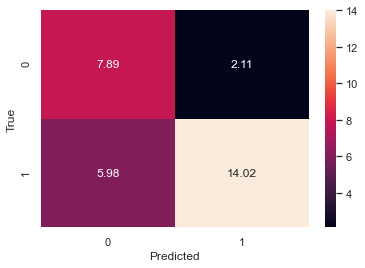

In [109]:
# Average Confusion Matrix
iris_smote_avg_cm = sum(iris_smote_cm) / len(iris_smote_cm)

gfg = sns.heatmap(iris_smote_avg_cm, annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_avg_confusion.png', dpi=200)

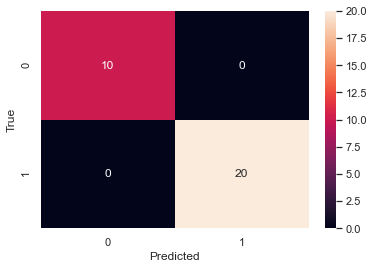

In [110]:
# Best confusion matrix
m_index = iris_smote_scores['F1'].argmax()


gfg = sns.heatmap(iris_smote_cm[m_index], annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_best_confusion.png', dpi=200)

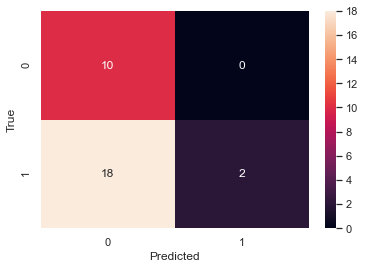

In [125]:
# Best confusion matrix
m_index = iris_smote_scores['F1'].argmin()


gfg = sns.heatmap(iris_smote_cm[m_index], annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_best_confusion.png', dpi=200)

## Non-SMOTE Iris Dataset

In [88]:
data, history_iris = extract_and_combine(file='results/iris__*_results.pkl', combine=True)
iris_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
iris_data = {'test_score': [], 'train_score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_iris.items():
    if n_buckets in ['L', 'best_model'] : # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        iris_data['test_score'].append(score[0])
        iris_data['train_score'].append(score[1])
        iris_data['buckets'].append(100 - n_buckets)
        iris_data['n_run'].append(n_run)
        

In [89]:
#Spambase with SMOTE# Plot Configuration
height = 4
aspect = 12/7

In [90]:
iris_data

{'test_score': [0.3333333333333333,
  1.0,
  0.6666666666666666,
  1.0,
  0.6666666666666666,
  0.9666666666666667,
  0.6666666666666666,
  0.6666666666666666,
  0.3333333333333333,
  0.6666666666666666,
  1.0,
  1.0,
  0.3333333333333333,
  0.6666666666666666,
  1.0,
  1.0,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  1.0,
  0.6666666666666666,
  1.0,
  0.8666666666666667,
  1.0,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  1.0,
  0.6666666666666666,
  0.6666666666666666,
  1.0,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.3333333333333333,
  0.8333333333333334,
  1.0,
  0.6666666666666666,
  0.3333333333333333,
  0.6666666666666666,
  0.6666666666666666,
  1.0,
  1.0,
  1.0,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  1.0,
  0.3333333333333333,
  0.6666666666666666,
  0.6666666666666666,
  0.6666666666666666,
  0.666666666666

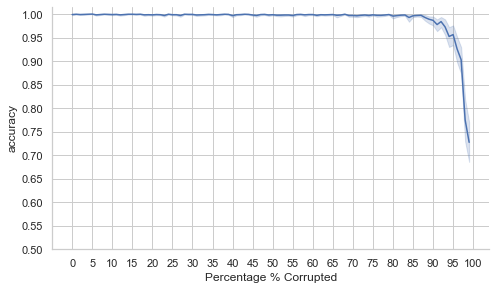

In [91]:
ax = sns.relplot(data=iris_data, kind='line', x='buckets', y='test_score', height=height, aspect=aspect)
# Figure Attributes (using pyplot)
#plt.title('Score vs Buckets Used (Synthetic Linearly-Separable)')
# Since the lowest number of buckets used is 1, I add it directly bc range will not allow it
plt.xticks(
    ticks=range(0, 101, 5), 
    labels=[percentage for percentage in range(0, 101, 5)]
)
plt.yticks(np.linspace(1., .5, 11))
plt.xlabel("Percentage % Corrupted")
plt.ylabel("accuracy")
#plt.gca().invert_xaxis()
#ax.set(title='Score vs Buckets Used')
#plt.show()
plt.savefig('iris_percent.png', dpi=200)

In [92]:
pd.DataFrame([iris_data['test_score'], iris_data['buckets'], ]).T.groupby([1]).min().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.966667
25.0,0.966667
50.0,0.966667
75.0,0.966667
90.0,0.666667
95.0,0.633333
99.0,0.333333


In [93]:
pd.DataFrame([iris_data['test_score'], iris_data['buckets'], ]).T.groupby([1]).mean().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.999000
25.0,0.998667
50.0,0.998667
75.0,0.998333
90.0,0.986667
95.0,0.956333
99.0,0.727333


In [111]:
# Create Confusion Matrices
iris_cm = []
for hist in history_iris['best_model']:
    iris_cm.append(confusion_matrix(hist['y'], hist['train_pred']))
    
# Best and Worst confusion matrices
iris_scores = {
    'precision': [],
    'recall'   : [],
    'F1'       : [],
    'true_pred': []
}

for cm in iris_cm:
    # Error types
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    # Comparison score calculations
    precision = TP / (TP + FP)
    iris_scores['precision'].append(precision)
    
    recall    = TP / (TP + FN)
    iris_scores['recall'].append(recall)
    
    F1        = (2*(precision * recall)) / (precision + recall)
    iris_scores['F1'].append(F1)
    
    true_pred = TP + TN
    iris_scores['true_pred'].append(true_pred)
    
iris_scores = pd.DataFrame(iris_scores)

<ipython-input-111-74790e971445>:22: RuntimeWarning: invalid value encountered in long_scalars
  precision = TP / (TP + FP)


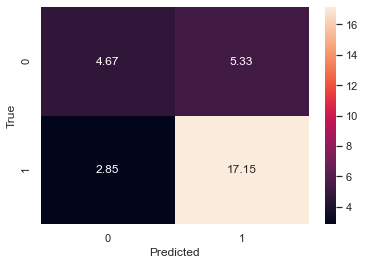

In [112]:
# Average Confusion Matrix
iris_avg_cm = sum(iris_cm) / len(iris_cm)

gfg = sns.heatmap(iris_avg_cm, annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_avg_confusion.png', dpi=200)

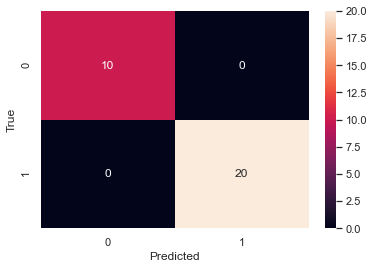

In [113]:
# Best confusion matrix
m_index = iris_scores['F1'].argmax()


gfg = sns.heatmap(iris_cm[m_index], annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_best_confusion.png', dpi=200)

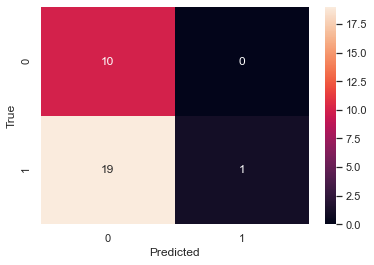

In [124]:
# Best confusion matrix
m_index = iris_scores['F1'].argmin()


gfg = sns.heatmap(iris_cm[m_index], annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_best_confusion.png', dpi=200)

## SMOTE Skin Dataset

In [94]:
data, history_skin_smote = extract_and_combine(file='results/skin_SMOTE_*_results.pkl', combine=True)
skin_smote_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
skin_smote_data = {'test_score': [], 'train_score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_skin_smote.items():
    if n_buckets in ['L', 'best_model'] : # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        skin_smote_data['test_score'].append(score[0])
        skin_smote_data['train_score'].append(score[1])
        skin_smote_data['buckets'].append(100 - n_buckets)
        skin_smote_data['n_run'].append(n_run)
        

In [95]:
#Spambase with SMOTE# Plot Configuration
height = 4
aspect = 12/7

In [96]:
skin_smote_data

{'test_score': [0.9116666666666666,
  0.9333333333333333,
  0.9283333333333333,
  0.9333333333333333,
  0.94,
  0.9066666666666666,
  0.9116666666666666,
  0.905,
  0.9383333333333334,
  0.9166666666666666,
  0.8666666666666667,
  0.92,
  0.9083333333333333,
  0.8683333333333333,
  0.92,
  0.92,
  0.94,
  0.9166666666666666,
  0.91,
  0.88,
  0.9033333333333333,
  0.9533333333333334,
  0.8983333333333333,
  0.9166666666666666,
  0.9033333333333333,
  0.9316666666666666,
  0.935,
  0.8716666666666667,
  0.94,
  0.9083333333333333,
  0.8983333333333333,
  0.9,
  0.945,
  0.915,
  0.885,
  0.9133333333333333,
  0.9183333333333333,
  0.935,
  0.9266666666666666,
  0.935,
  0.925,
  0.9266666666666666,
  0.9166666666666666,
  0.89,
  0.9133333333333333,
  0.9166666666666666,
  0.93,
  0.9283333333333333,
  0.93,
  0.9416666666666667,
  0.9183333333333333,
  0.9183333333333333,
  0.9016666666666666,
  0.885,
  0.9233333333333333,
  0.875,
  0.9233333333333333,
  0.91,
  0.91,
  0.93,
  0.933

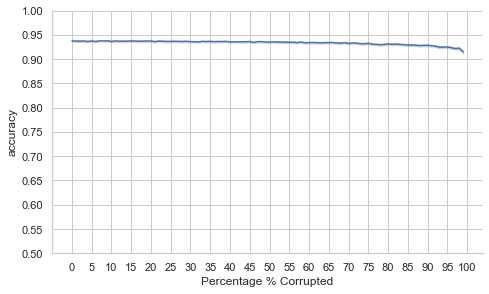

In [97]:
ax = sns.relplot(data=skin_smote_data, kind='line', x='buckets', y='test_score', height=height, aspect=aspect)
# Figure Attributes (using pyplot)
#plt.title('Score vs Buckets Used (Synthetic Linearly-Separable)')
# Since the lowest number of buckets used is 1, I add it directly bc range will not allow it
plt.xticks(
    ticks=range(0, 101, 5), 
    labels=[percentage for percentage in range(0, 101, 5)]
)
plt.yticks(np.linspace(1., .5, 11))
plt.xlabel("Percentage % Corrupted")
plt.ylabel("accuracy")
#plt.gca().invert_xaxis()
#ax.set(title='Score vs Buckets Used')
#plt.show()
plt.savefig('skin_percent.png', dpi=200)

In [98]:
pd.DataFrame([skin_smote_data['test_score'], skin_smote_data['buckets'], ]).T.groupby([1]).min().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.915000
25.0,0.910000
50.0,0.908333
75.0,0.903333
90.0,0.903333
95.0,0.891667
99.0,0.866667


In [99]:
pd.DataFrame([skin_smote_data['test_score'], skin_smote_data['buckets'], ]).T.groupby([1]).mean().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.937700
25.0,0.936683
50.0,0.935233
75.0,0.932550
90.0,0.928600
95.0,0.925133
99.0,0.914900


In [114]:
# Create Confusion Matrices
skin_smote_cm = []
for hist in history_skin_smote['best_model']:
    skin_smote_cm.append(confusion_matrix(hist['y'], hist['train_pred']))
    
# Best and Worst confusion matrices
skin_smote_scores = {
    'precision': [],
    'recall'   : [],
    'F1'       : [],
    'true_pred': []
}

for cm in skin_smote_cm:
    # Error types
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    # Comparison score calculations
    precision = TP / (TP + FP)
    skin_smote_scores['precision'].append(precision)
    
    recall    = TP / (TP + FN)
    skin_smote_scores['recall'].append(recall)
    
    F1        = (2*(precision * recall)) / (precision + recall)
    skin_smote_scores['F1'].append(F1)
    
    true_pred = TP + TN
    skin_smote_scores['true_pred'].append(true_pred)
    
skin_smote_scores = pd.DataFrame(skin_smote_scores)

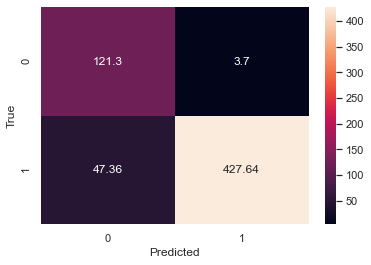

In [117]:
# Average Confusion Matrix
skin_smote_avg_cm = sum(skin_smote_cm) / len(skin_smote_cm)

gfg = sns.heatmap(skin_smote_avg_cm, annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_avg_confusion.png', dpi=200)

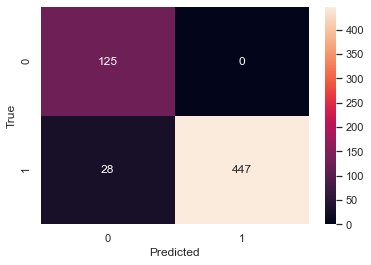

In [118]:
# Best confusion matrix
m_index = skin_smote_scores['F1'].argmax()


gfg = sns.heatmap(skin_smote_cm[m_index], annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_best_confusion.png', dpi=200)

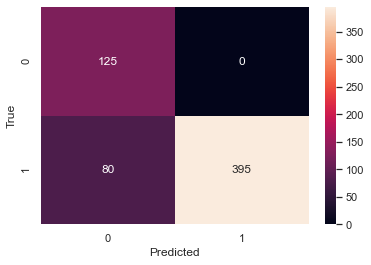

In [122]:
# Best confusion matrix
m_index = skin_smote_scores['F1'].argmin()


gfg = sns.heatmap(skin_smote_cm[m_index], annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_best_confusion.png', dpi=200)

## Non-SMOTE Skin Dataset

In [100]:
data, history_skin = extract_and_combine(file='results/skin__*_results.pkl', combine=True)
skin_pkl = data[list(data.keys())[0]] # For ease of information

#history_lin = lin_pkl['history']

# Make into sns format
# Linear Results
skin_data = {'test_score': [], 'train_score': [], 'buckets': [], 'n_run': []}
for n_buckets, scores in history_skin.items():
    if n_buckets in ['L', 'best_model'] : # Ignore weight vector distance for plots
        continue
    for n_run, score in enumerate(scores):
        skin_data['test_score'].append(score[0])
        skin_data['train_score'].append(score[1])
        skin_data['buckets'].append(100 - n_buckets)
        skin_data['n_run'].append(n_run)
        

In [101]:
#Spambase with SMOTE# Plot Configuration
height = 4
aspect = 12/7

In [102]:
skin_data

{'test_score': [0.9316666666666666,
  0.9283333333333333,
  0.9216666666666666,
  0.78,
  0.8583333333333333,
  0.7583333333333333,
  0.9083333333333333,
  0.7833333333333333,
  0.8983333333333333,
  0.9166666666666666,
  0.8783333333333333,
  0.8883333333333333,
  0.93,
  0.9216666666666666,
  0.8883333333333333,
  0.8933333333333333,
  0.785,
  0.8016666666666666,
  0.94,
  0.83,
  0.9516666666666667,
  0.88,
  0.9083333333333333,
  0.905,
  0.8616666666666667,
  0.8983333333333333,
  0.935,
  0.9266666666666666,
  0.8733333333333333,
  0.915,
  0.9133333333333333,
  0.905,
  0.7816666666666666,
  0.7916666666666666,
  0.925,
  0.93,
  0.9233333333333333,
  0.875,
  0.8983333333333333,
  0.8616666666666667,
  0.885,
  0.9183333333333333,
  0.9066666666666666,
  0.8716666666666667,
  0.9216666666666666,
  0.9333333333333333,
  0.9166666666666666,
  0.8766666666666667,
  0.935,
  0.79,
  0.8966666666666666,
  0.9333333333333333,
  0.9116666666666666,
  0.925,
  0.9466666666666667,
  0.

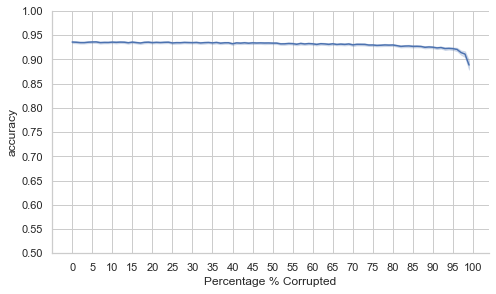

In [103]:
ax = sns.relplot(data=skin_data, kind='line', x='buckets', y='test_score', height=height, aspect=aspect)
# Figure Attributes (using pyplot)
#plt.title('Score vs Buckets Used (Synthetic Linearly-Separable)')
# Since the lowest number of buckets used is 1, I add it directly bc range will not allow it
plt.xticks(
    ticks=range(0, 101, 5), 
    labels=[percentage for percentage in range(0, 101, 5)]
)
plt.yticks(np.linspace(1., .5, 11))
plt.xlabel("Percentage % Corrupted")
plt.ylabel("accuracy")
#plt.gca().invert_xaxis()
#ax.set(title='Score vs Buckets Used')
#plt.show()
plt.savefig('skin_percent.png', dpi=200)

In [126]:
pd.DataFrame([skin_data['test_score'], skin_data['buckets'], ]).T.groupby([1]).min().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.905000
25.0,0.905000
50.0,0.910000
75.0,0.906667
90.0,0.901667
95.0,0.878333
99.0,0.726667


In [127]:
pd.DataFrame([skin_data['test_score'], skin_data['buckets'], ]).T.groupby([1]).mean().loc[[0, 25, 50, 75, 90, 95, 99]]

,0
1,
0.0,0.935883
25.0,0.934017
50.0,0.933650
75.0,0.929800
90.0,0.925233
95.0,0.922217
99.0,0.888417


In [119]:
# Create Confusion Matrices
skin_cm = []
for hist in history_skin['best_model']:
    skin_cm.append(confusion_matrix(hist['y'], hist['train_pred']))
    
# Best and Worst confusion matrices
skin_scores = {
    'precision': [],
    'recall'   : [],
    'F1'       : [],
    'true_pred': []
}

for cm in skin_cm:
    # Error types
    TP = cm[1,1]
    TN = cm[0,0]
    FP = cm[0,1]
    FN = cm[1,0]
    
    # Comparison score calculations
    precision = TP / (TP + FP)
    skin_scores['precision'].append(precision)
    
    recall    = TP / (TP + FN)
    skin_scores['recall'].append(recall)
    
    F1        = (2*(precision * recall)) / (precision + recall)
    skin_scores['F1'].append(F1)
    
    true_pred = TP + TN
    skin_scores['true_pred'].append(true_pred)
    
skin_scores = pd.DataFrame(skin_scores)

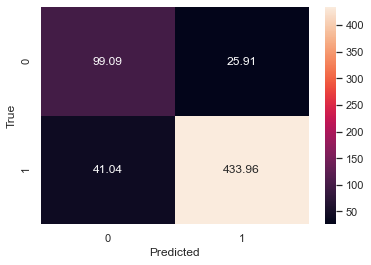

In [120]:
# Average Confusion Matrix
skin_avg_cm = sum(skin_cm) / len(skin_smote_cm)

gfg = sns.heatmap(skin_avg_cm, annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_avg_confusion.png', dpi=200)

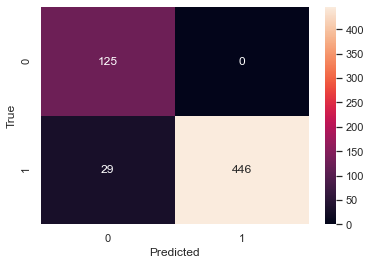

In [121]:
# Best confusion matrix
m_index = skin_scores['F1'].argmax()


gfg = sns.heatmap(skin_cm[m_index], annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_best_confusion.png', dpi=200)

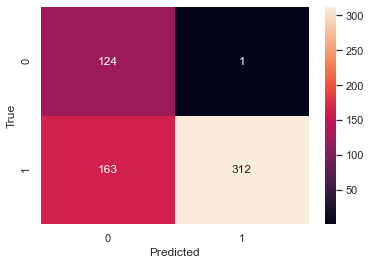

In [123]:
# Best confusion matrix
m_index = skin_scores['F1'].argmin()


gfg = sns.heatmap(skin_cm[m_index], annot=True, fmt='g')
gfg.set(xlabel="Predicted", ylabel="True")
plt.savefig('bank_best_confusion.png', dpi=200)

### MISC

with open('../new_datasets/SPECT.pkl', 'rb') as jar:
    spect_data = pickle.load(jar)

spect_data['y'].value_counts()

(55/212)*100